In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In /home/dongjun819/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dongjun819/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dongjun819/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/dongjun819/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dongjun819/.local/lib/python3.6/site-packages/m

In [2]:
sample_data=pd.read_csv('sample_submission.csv')
sample_data.shape

(1459, 2)

## Train Data

In [3]:
train_data=pd.read_csv('train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.shape

(1460, 81)

In [5]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

[Text(0, 0.5, 'Frequency')]

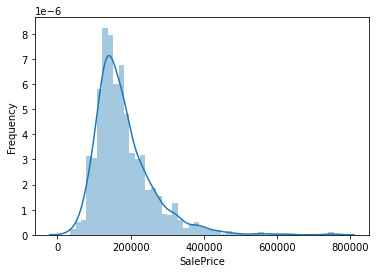

In [6]:
graph = sns.distplot(train_data.SalePrice)
graph.set(ylabel='Frequency')

<AxesSubplot:>

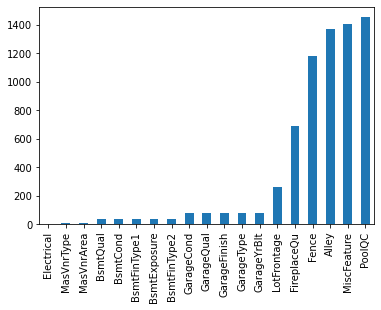

In [7]:
null_data =train_data.isnull().sum()
null_data=null_data[null_data>0].sort_values()
null_data.plot.bar()

In [8]:
print(null_data)

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64


### Electrical data
Electrical: Electrical system

       SBrkr:	Standard Circuit Breakers & Romex
       FuseA:	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF:	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP:	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix:      Mixed

<AxesSubplot:xlabel='Electrical', ylabel='count'>

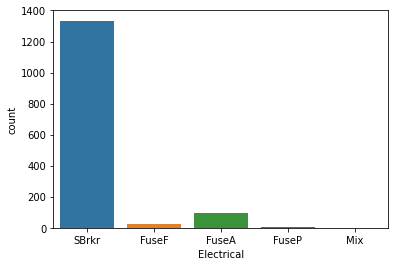

In [9]:
sns.countplot(train_data['Electrical'])

Since SBrkr is majority of Electrical data, Will fill null value with SBrkr. 

In [10]:
train_data['Electrical']=train_data['Electrical'].fillna('SBrkr')

In [11]:
train_data['Electrical'].isnull().sum()

0

### MasVnrType

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

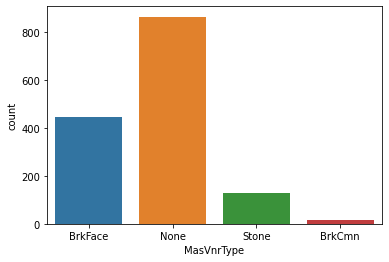

In [12]:
sns.countplot(train_data['MasVnrType'])

In [13]:
train_data['MasVnrType']=train_data['MasVnrType'].fillna('None')
train_data['MasVnrType'].isnull().sum()

0

### MasVnrArea: Masonry veneer area in square feet

In [14]:
train_data['MasVnrArea']=train_data['MasVnrArea'].fillna('None')
train_data['MasVnrArea'].isnull().sum()

0

### BsmtQual
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

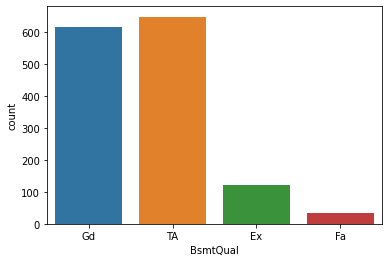

In [15]:
sns.countplot(train_data['BsmtQual'])

In [16]:
train_data['BsmtQual']=train_data['BsmtQual'].fillna('TA')
train_data['BsmtQual'].isnull().sum()

0

### BsmtCond
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

<AxesSubplot:xlabel='BsmtCond', ylabel='count'>

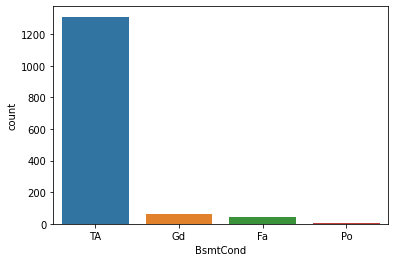

In [17]:
sns.countplot(train_data['BsmtCond'])

In [18]:
train_data['BsmtCond']=train_data['BsmtCond'].fillna('TA')
train_data['BsmtCond'].isnull().sum()

0

### BsmtFinType1
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

<AxesSubplot:xlabel='BsmtFinType1', ylabel='count'>

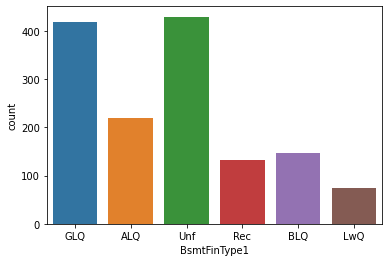

In [19]:
sns.countplot(train_data['BsmtFinType1'])

In [20]:
train_data['BsmtFinType1']=train_data['BsmtFinType1'].fillna('Unf')
train_data['BsmtFinType1'].isnull().sum()

0

### BsmtExposure
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

<AxesSubplot:xlabel='BsmtExposure', ylabel='count'>

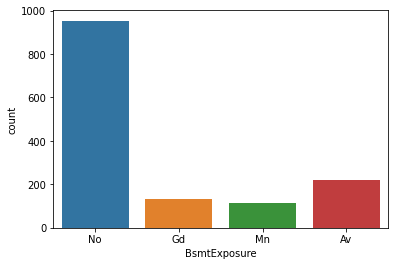

In [21]:
sns.countplot(train_data['BsmtExposure'])

In [22]:
train_data['BsmtExposure']=train_data['BsmtExposure'].fillna('No')
train_data['BsmtExposure'].isnull().sum()

0

### BsmtFinType2
BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

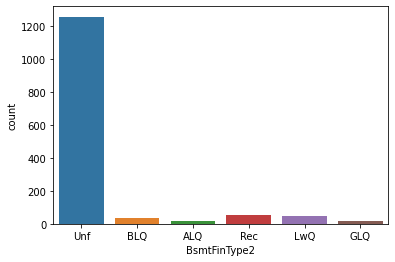

In [23]:
sns.countplot(train_data['BsmtFinType2'])

In [24]:
train_data['BsmtFinType2']=train_data['BsmtFinType2'].fillna('Unf')
train_data['BsmtFinType2'].isnull().sum()

0

### GarageCond
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

<AxesSubplot:xlabel='GarageCond', ylabel='count'>

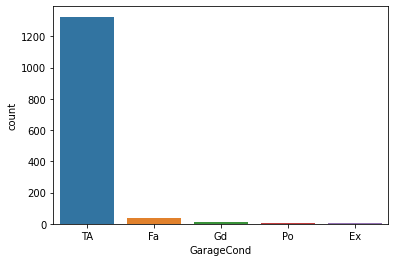

In [25]:
sns.countplot(train_data['GarageCond'])

In [26]:
train_data['GarageCond']=train_data['GarageCond'].fillna('TA')
train_data['GarageCond'].isnull().sum()

0

### GarageQual
GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

<AxesSubplot:xlabel='GarageQual', ylabel='count'>

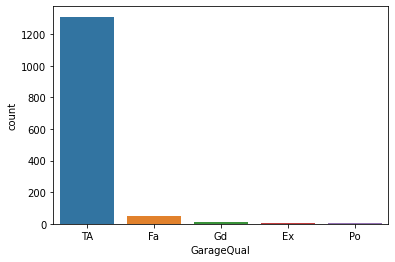

In [27]:
sns.countplot(train_data['GarageQual'])

In [28]:
train_data['GarageQual']=train_data['GarageQual'].fillna('TA')
train_data['GarageQual'].isnull().sum()

0

### GarageFinish
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

<AxesSubplot:xlabel='GarageFinish', ylabel='count'>

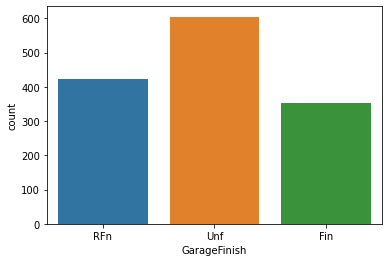

In [29]:
sns.countplot(train_data['GarageFinish'])

In [30]:
train_data['GarageFinish']=train_data['GarageFinish'].fillna('Unf')
train_data['GarageFinish'].isnull().sum()

0

### GarageType
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

<AxesSubplot:xlabel='GarageType', ylabel='count'>

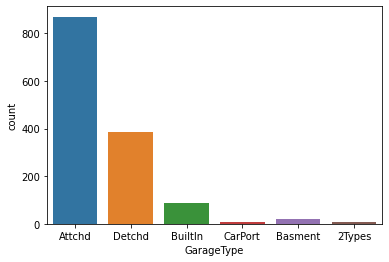

In [31]:
sns.countplot(train_data['GarageType'])

In [32]:
train_data['GarageType']=train_data['GarageType'].fillna('Attchd')
train_data['GarageType'].isnull().sum()

0

### GarageYrBlt
GarageYrBlt: Year garage was built

<AxesSubplot:xlabel='GarageYrBlt', ylabel='count'>

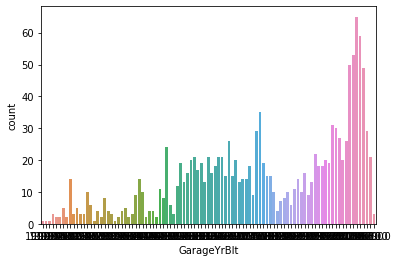

In [33]:
sns.countplot(train_data['GarageYrBlt'])

In [34]:
train_data['GarageYrBlt'].mean()

1978.5061638868744

In [35]:
train_data['GarageYrBlt']=train_data['GarageYrBlt'].fillna('1979')
train_data['GarageYrBlt'].isnull().sum()

0

### LotFrontage
LotFrontage: Linear feet of street connected to property

<AxesSubplot:xlabel='LotFrontage', ylabel='count'>

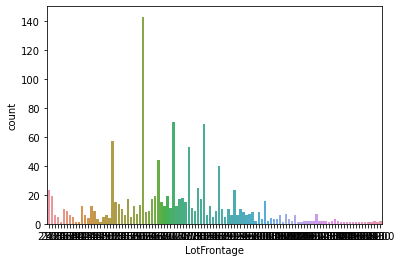

In [36]:
sns.countplot(train_data['LotFrontage'])

In [37]:
train_data['LotFrontage'].mean()

70.04995836802665

In [38]:
train_data['LotFrontage']=train_data['LotFrontage'].fillna('70')
train_data['LotFrontage'].isnull().sum()

0

### FireplaceQu
FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

<AxesSubplot:xlabel='FireplaceQu', ylabel='count'>

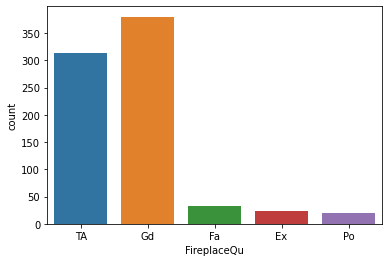

In [39]:
sns.countplot(train_data['FireplaceQu'])

In [40]:
train_data['FireplaceQu']=train_data['FireplaceQu'].fillna('Gd')
train_data['FireplaceQu'].isnull().sum()

0

### Fence
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

<AxesSubplot:xlabel='Fence', ylabel='count'>

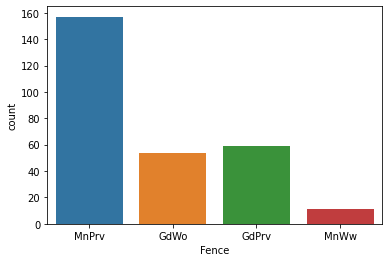

In [41]:
sns.countplot(train_data['Fence'])

In [42]:
train_data['Fence']=train_data['Fence'].fillna('MnPrv')
train_data['Fence'].isnull().sum()

0

### Alley
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

<AxesSubplot:xlabel='Alley', ylabel='count'>

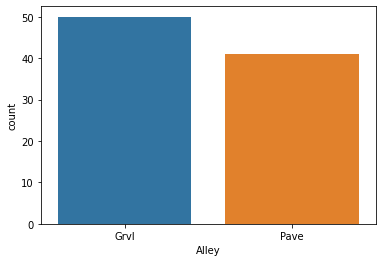

In [43]:
sns.countplot(train_data['Alley'])

In [44]:
train_data['Alley']=train_data['Alley'].fillna('Grvl')
train_data['Alley'].isnull().sum()

0

### MiscFeature
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

<AxesSubplot:xlabel='MiscFeature', ylabel='count'>

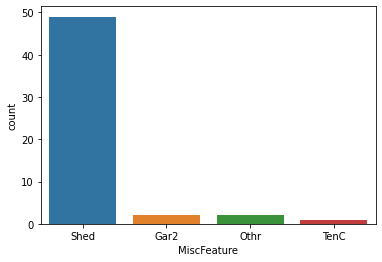

In [45]:
sns.countplot(train_data['MiscFeature'])

In [46]:
train_data['MiscFeature']=train_data['MiscFeature'].fillna('Shed')
train_data['MiscFeature'].isnull().sum()

0

### PoolQC
PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

<AxesSubplot:xlabel='PoolQC', ylabel='count'>

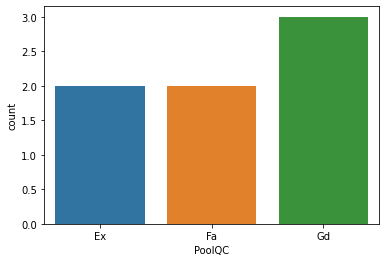

In [47]:
sns.countplot(train_data['PoolQC'])

In [48]:
train_data['PoolQC']=train_data['PoolQC'].fillna('Gd')
train_data['PoolQC'].isnull().sum()

0

In [49]:
train_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [50]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


Test Data

In [51]:
test_data=pd.read_csv('test.csv')
test_data.shape

(1459, 80)

<AxesSubplot:>

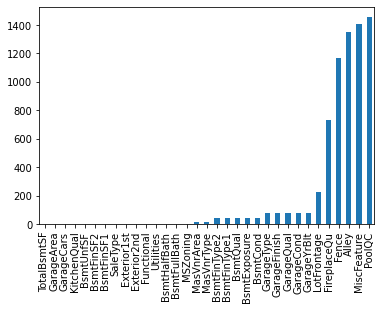

In [52]:
test_null_data =test_data.isnull().sum()
test_null_data=test_null_data[test_null_data>0].sort_values()
test_null_data.plot.bar()

In [53]:
test_null_data

TotalBsmtSF        1
GarageArea         1
GarageCars         1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
Exterior1st        1
Exterior2nd        1
Functional         2
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        15
MasVnrType        16
BsmtFinType2      42
BsmtFinType1      42
BsmtQual          44
BsmtExposure      44
BsmtCond          45
GarageType        76
GarageFinish      78
GarageQual        78
GarageCond        78
GarageYrBlt       78
LotFrontage      227
FireplaceQu      730
Fence           1169
Alley           1352
MiscFeature     1408
PoolQC          1456
dtype: int64

### TotalBsmtSF
TotalBsmtSF: Total square feet of basement area

In [54]:
test_data['TotalBsmtSF']=test_data['TotalBsmtSF'].fillna('0')
test_data['TotalBsmtSF'].isnull().sum()

0

### GarageArea
GarageArea: Size of garage in square feet

In [55]:
test_data['GarageArea']=test_data['GarageArea'].fillna('0')
test_data['GarageArea'].isnull().sum()

0

### GarageCars
GarageCars: Size of garage in car capacity

<AxesSubplot:xlabel='GarageCars', ylabel='count'>

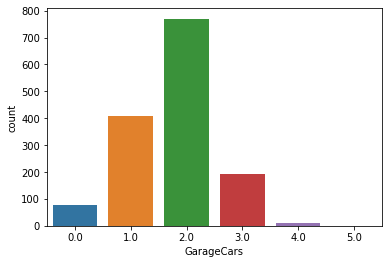

In [56]:
sns.countplot(test_data['GarageCars'])

In [57]:
test_data['GarageCars']=test_data['GarageCars'].fillna('2.0')
test_data['GarageCars'].isnull().sum()

0

### KitchenQual
KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

<AxesSubplot:xlabel='KitchenQual', ylabel='count'>

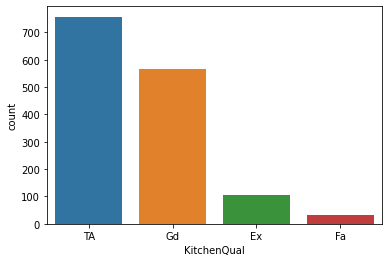

In [58]:
sns.countplot(test_data['KitchenQual'])

In [59]:
test_data['KitchenQual']=test_data['KitchenQual'].fillna('TA')
test_data['KitchenQual'].isnull().sum()

0

### BsmtUnfSF
BsmtUnfSF: Unfinished square feet of basement area

In [60]:
test_data['BsmtUnfSF']=test_data['BsmtUnfSF'].fillna('0')
test_data['BsmtUnfSF'].isnull().sum()

0

In [61]:
test_data['BsmtFinSF1']=test_data['BsmtFinSF1'].fillna('0')
test_data['BsmtFinSF2']=test_data['BsmtFinSF2'].fillna('0')
test_data['BsmtFinSF1'].isnull().sum()

0

### SaleType
SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

<AxesSubplot:xlabel='SaleType', ylabel='count'>

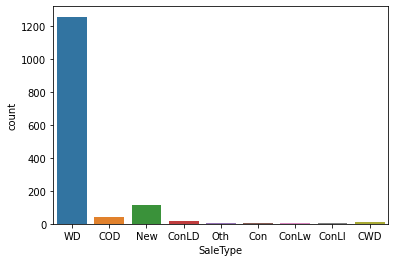

In [62]:
sns.countplot(test_data['SaleType'])

In [63]:
test_data['SaleType']=test_data['SaleType'].fillna('WD')
test_data['SaleType'].isnull().sum()

0

### Exterior1st
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

<AxesSubplot:xlabel='Exterior1st', ylabel='count'>

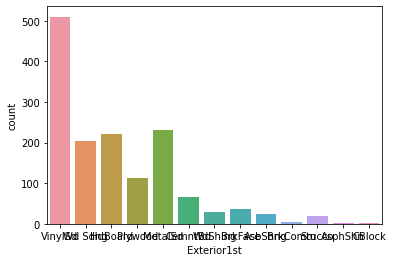

In [64]:
sns.countplot(test_data['Exterior1st'])

In [65]:
test_data['Exterior1st']=test_data['Exterior1st'].fillna('VinylSd')
test_data['Exterior1st'].isnull().sum()

0

<AxesSubplot:xlabel='Exterior2nd', ylabel='count'>

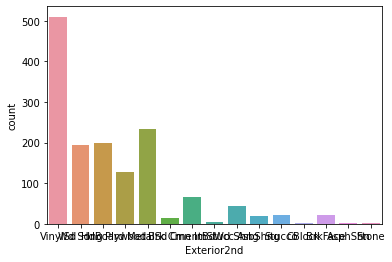

In [66]:
sns.countplot(test_data['Exterior2nd'])

In [67]:
test_data['Exterior2nd']=test_data['Exterior2nd'].fillna('VinylSd')
test_data['Exterior2nd'].isnull().sum()

0

### Functional
Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

<AxesSubplot:xlabel='Functional', ylabel='count'>

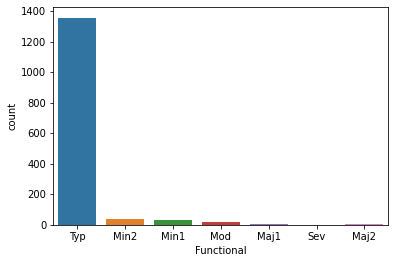

In [68]:
sns.countplot(test_data['Functional'])

In [69]:
test_data['Functional']=test_data['Functional'].fillna('Typ')
test_data['Functional'].isnull().sum()

0

### Utilities
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	

<AxesSubplot:xlabel='Utilities', ylabel='count'>

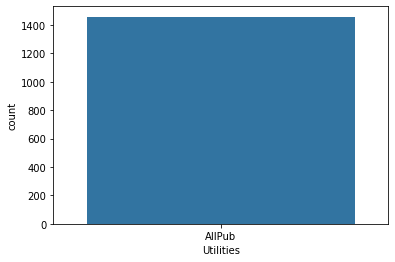

In [70]:
sns.countplot(test_data['Utilities'])

In [71]:
test_data['Utilities']=test_data['Utilities'].fillna('AllPub')
test_data['Utilities'].isnull().sum()

0

### BsmtHalfBath
BsmtHalfBath: Basement half bathrooms

<AxesSubplot:xlabel='BsmtHalfBath', ylabel='count'>

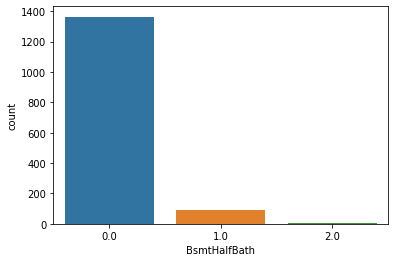

In [72]:
sns.countplot(test_data['BsmtHalfBath'])

In [73]:
test_data['BsmtHalfBath']=test_data['BsmtHalfBath'].fillna('0.0')
test_data['BsmtHalfBath'].isnull().sum()

0

### BsmtFullBath
BsmtFullBath: Basement full bathrooms

<AxesSubplot:xlabel='BsmtFullBath', ylabel='count'>

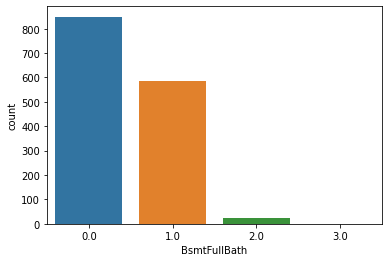

In [74]:
sns.countplot(test_data['BsmtFullBath'])

In [75]:
test_data['BsmtFullBath']=test_data['BsmtFullBath'].fillna('0.0')
test_data['BsmtFullBath'].isnull().sum()

0

### MSZoning
MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

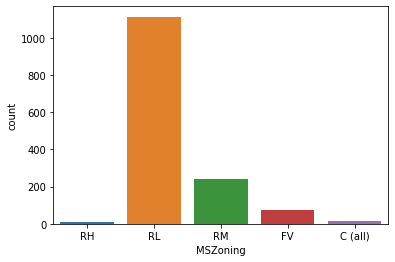

In [76]:
sns.countplot(test_data['MSZoning'])

In [77]:
test_data['MSZoning']=test_data['MSZoning'].fillna('RL')
test_data['MSZoning'].isnull().sum()

0

Do samething just like train data

In [78]:
test_data['MasVnrType']=test_data['MasVnrType'].fillna('None')
test_data['MasVnrArea']=test_data['MasVnrArea'].fillna('None')
test_data['BsmtQual']=test_data['BsmtQual'].fillna('TA')
test_data['BsmtCond']=test_data['BsmtCond'].fillna('TA')
test_data['BsmtFinType1']=test_data['BsmtFinType1'].fillna('Unf')
test_data['BsmtExposure']=test_data['BsmtExposure'].fillna('No')
test_data['BsmtFinType2']=test_data['BsmtFinType2'].fillna('Unf')
test_data['GarageCond']=test_data['GarageCond'].fillna('TA')
test_data['GarageQual']=test_data['GarageQual'].fillna('TA')
test_data['GarageFinish']=test_data['GarageFinish'].fillna('Unf')
test_data['GarageType']=test_data['GarageType'].fillna('Attchd')
test_data['GarageYrBlt']=test_data['GarageYrBlt'].fillna('1979')
test_data['LotFrontage']=test_data['LotFrontage'].fillna('70')
test_data['FireplaceQu']=test_data['FireplaceQu'].fillna('Gd')
test_data['Fence']=test_data['Fence'].fillna('MnPrv')
test_data['Alley']=test_data['Alley'].fillna('Grvl')
test_data['MiscFeature']=test_data['MiscFeature'].fillna('Shed')
test_data['PoolQC']=test_data['PoolQC'].fillna('Gd')

In [79]:
train_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [80]:
test_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

In [81]:
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [82]:
y=train_data['SalePrice']
y=np.log(y+1)

In [83]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import cross_val_score

In [84]:
new_train_data = pd.get_dummies(pd.concat((train_data.drop(["SalePrice", "Id"], axis=1), test_data.drop(["Id"], axis=1)), axis=0)).iloc[: train_data.shape[0]]

new_test_data = pd.get_dummies(pd.concat((train_data.drop(["SalePrice", "Id"], axis=1), test_data.drop(["Id"], axis=1)), axis=0)).iloc[train_data.shape[0]:]

In [85]:
rr = Ridge(alpha=10)
rr.fit(new_train_data, y)
np.sqrt(-cross_val_score(rr, new_train_data, y, cv=5, scoring="neg_mean_squared_error")).mean()

0.13747184990083489

In [86]:
train_predict =rr.predict(new_train_data)

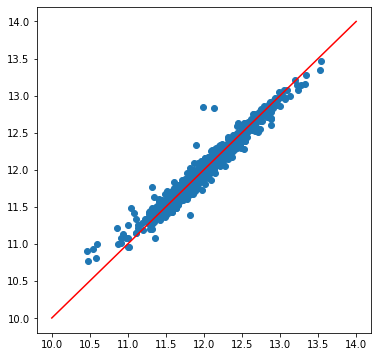

In [87]:
plt.figure(figsize=(6, 6))
plt.scatter(y, train_predict)
plt.plot(range(10, 15), range(10, 15), color="red")

In [88]:
test_predict = rr.predict(new_test_data)
q1 = pd.DataFrame(test_predict).quantile(0.0042)
pre_df = pd.DataFrame(test_predict)
pre_df["SalePrice"] = test_predict
pre_df = pre_df[["SalePrice"]]
sample_data["SalePrice"] = np.exp(pre_df)-1
sample_data.to_csv("result_dataset.csv", index=False)

In [89]:
sample_data.head()

,Id,SalePrice
0,1461,111945.049139
1,1462,138847.475593
2,1463,178681.380926
3,1464,199299.287794
4,1465,192811.473977


In [90]:
result_data=pd.read_csv('result_dataset.csv')
result_data.shape

(1459, 2)

In [91]:
result_data.head()

,Id,SalePrice
0,1461,111945.049139
1,1462,138847.475593
2,1463,178681.380926
3,1464,199299.287794
4,1465,192811.473977
